# Notebook Imports

In [85]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import pandas as pd
%matplotlib inline

# Gather Data

<a href=https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>Source: Original Research Paper</a>

In [2]:
boston_dataset= load_boston()

In [3]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)

In [6]:
boston

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [7]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
boston

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [9]:
boston.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

In [10]:
boston['PRICE'] = boston_dataset.target

# Data Exploration

In [11]:
boston.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

In [12]:
boston.isna().any().any() # No missing values

False

# Visualizing Data - Histograms, Distribution, and Bar Graphs

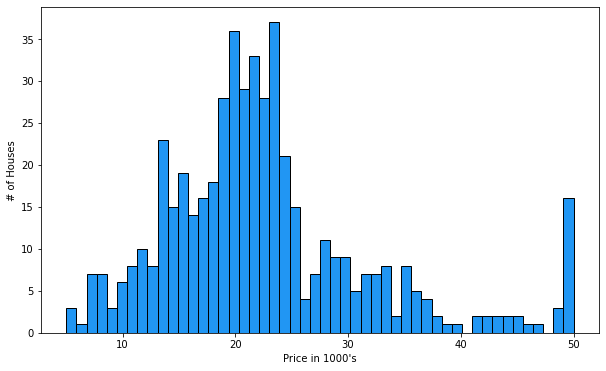

In [13]:
plt.figure(figsize=(10,6))
ax =boston.PRICE.plot.hist(bins=50,edgecolor='black',color='#2196f3')
ax.set_ylabel("# of Houses")
ax.set_xlabel("Price in 1000's");

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

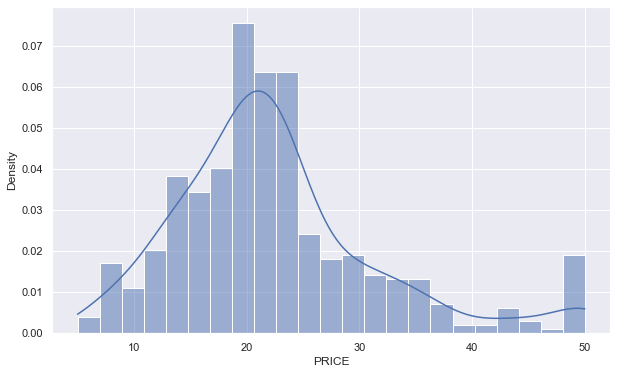

In [14]:
plt.figure(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns.histplot(boston.PRICE,stat='density',kde=True)

<AxesSubplot:xlabel='RM', ylabel='Count'>

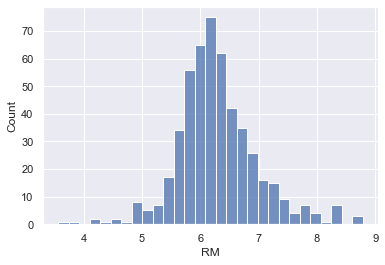

In [15]:
sns.histplot(data=boston,x='RM')

<Figure size 1440x864 with 0 Axes>

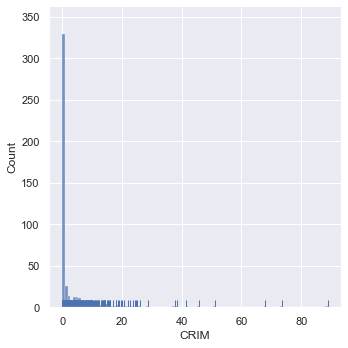

In [16]:
plt.figure(figsize=(20,12))
sns.displot(data=boston,x='CRIM',rug=True)

In [17]:
boston.RM.mean()

6.284634387351779

<AxesSubplot:ylabel='RAD'>

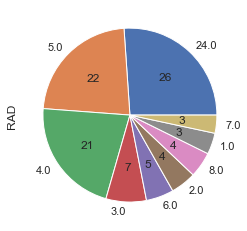

In [18]:
boston.RAD.value_counts().plot.pie(autopct="%d")

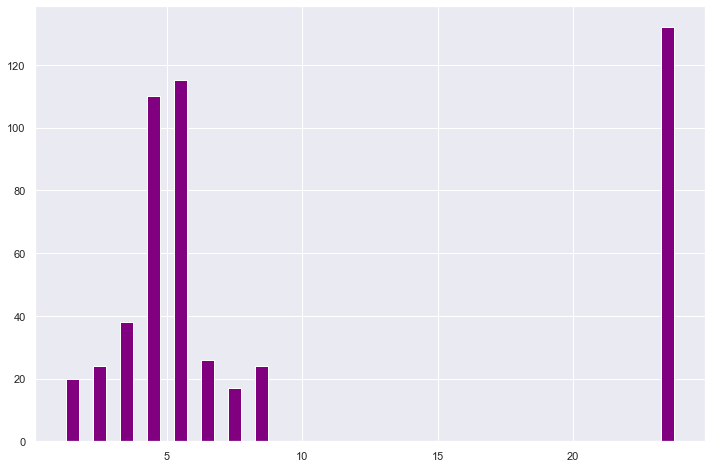

In [19]:
plt.figure(figsize=(12,8))
plt.hist(boston.RAD,bins=23,color='purple',rwidth=0.5);

(1.0, 24.0)

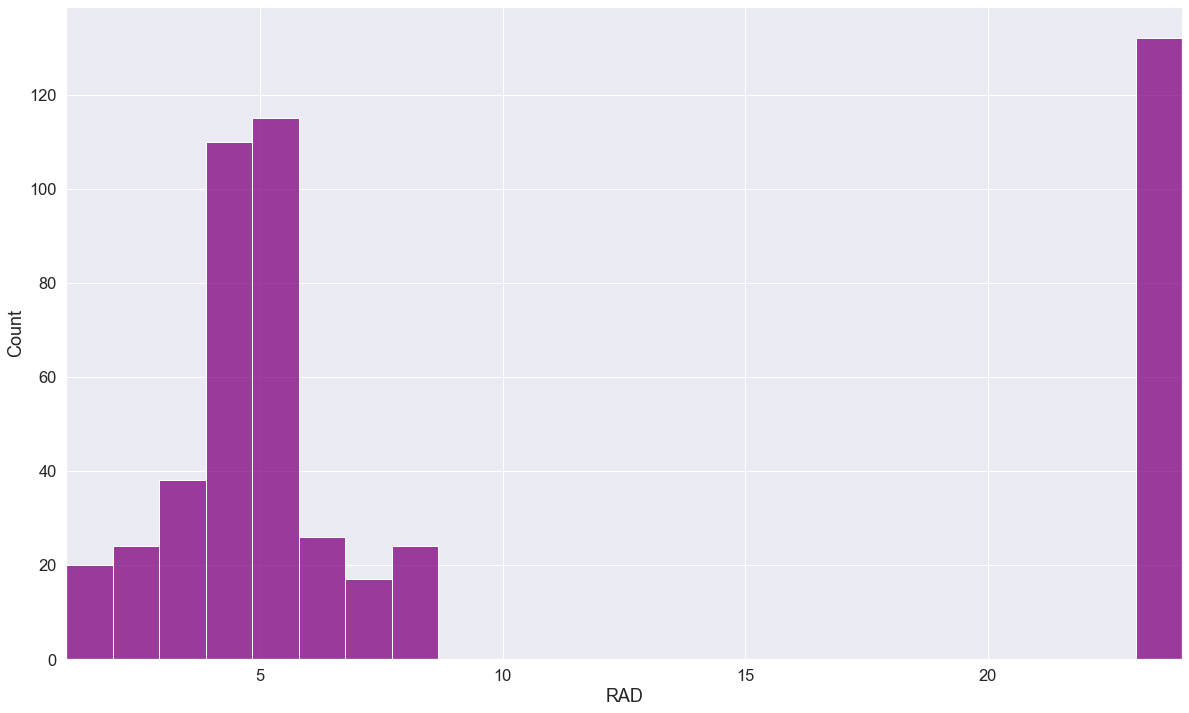

In [20]:
plt.figure(figsize=(20,12))
sns.set(font_scale=1.5)
ax = sns.histplot(boston.RAD,bins=24,color='purple')
ax.set_xlim(1,24)

In [21]:
frequency = boston['RAD'].value_counts()

<AxesSubplot:>

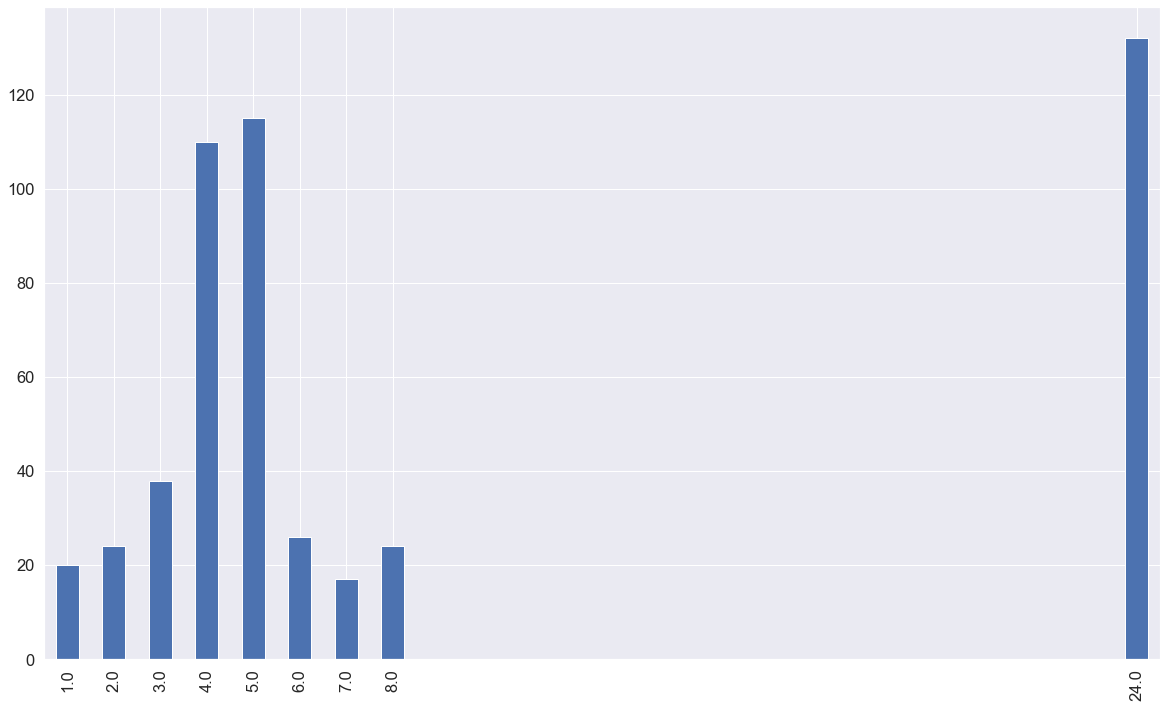

In [22]:
plt.figure(figsize=(20,12))
boston.RAD.value_counts().plot(kind='bar')

In [23]:
close = boston.CHAS.value_counts()

<AxesSubplot:>

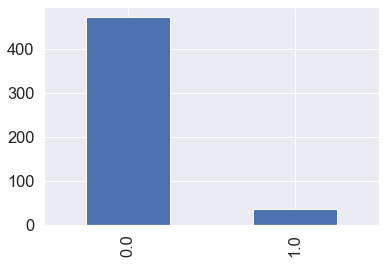

In [24]:
close.plot(kind='bar')

In [25]:
close

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [26]:
boston.groupby('CHAS').PRICE.mean()

CHAS
0.0    22.093843
1.0    28.440000
Name: PRICE, dtype: float64

# Descriptive Statistics

In [27]:
boston.PRICE.min()

5.0

In [28]:
boston.PRICE.max()

50.0

In [29]:
boston.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [30]:
boston.corr().loc['PRICE']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

## Correlation

## $$ \rho_{XY}  = corr(X,Y)$$
## $$ -1.0 \leq \rho_{XY} \leq 1.0 $$

In [31]:
boston.PRICE.corr(boston.RM)

0.695359947071539

In [32]:
boston.PRICE.corr(boston.PTRATIO)

-0.5077866855375615

In [33]:
boston.corr() # Pearson Correlation coefficients

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [34]:
mask = np.zeros_like(boston.corr())
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [35]:
triangle_indices = np.triu_indices_from(mask)

In [36]:
triangle_indices

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  8,
         8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11,
        12, 12, 13], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  1,  2,  3,
         4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  2,  3,  4,  5,  6,  7,  8,
         9, 10, 11, 12, 13,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  4,
         5,  6,  7,  8,  9, 10, 11, 12, 13,  5,  6,  7,  8,  9, 10, 11, 12,
        13,  6,  7,  8,  9, 10, 11, 12, 13,  7,  8,  9, 10, 11, 12, 13,  8,
         9, 10, 11, 12, 13,  9, 10, 11, 12, 13, 10, 11, 12, 13, 11, 12, 13,
        12, 13, 13], dtype=int64))

In [37]:
mask[triangle_indices] = True

In [38]:
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [39]:
corr = boston.corr()

In [40]:
mask_2 = np.array([[1 if j >i else 0 for j in range(corr.shape[1])] for i in range(corr.shape[0])])

In [41]:
mask_2

array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

<AxesSubplot:>

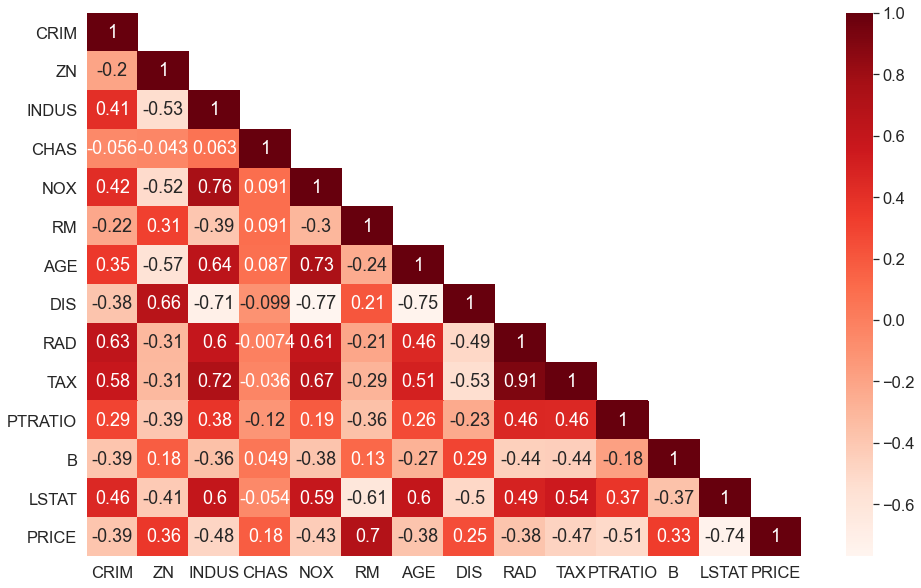

In [42]:
plt.figure(figsize=(16,10))
#sns.set(font_scale=1.5)
sns.set_theme(style='white',font_scale=1.5)
sns.heatmap(boston.corr(),cmap='Reds',annot=True,mask=mask_2)

<Figure size 648x432 with 0 Axes>

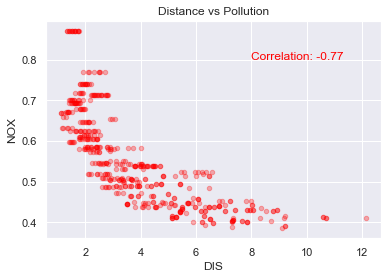

In [43]:
plt.figure(figsize=(9,6));
nox_dis_corr = boston.NOX.corr(boston.DIS)
sns.set(font_scale=1)
ax = boston.plot.scatter(x='DIS',y='NOX',c='red',alpha=0.3)
ax.annotate(text=f"Correlation: {nox_dis_corr:.2f}",xy=(8,0.8),color='red')
ax.set_title("Distance vs Pollution");

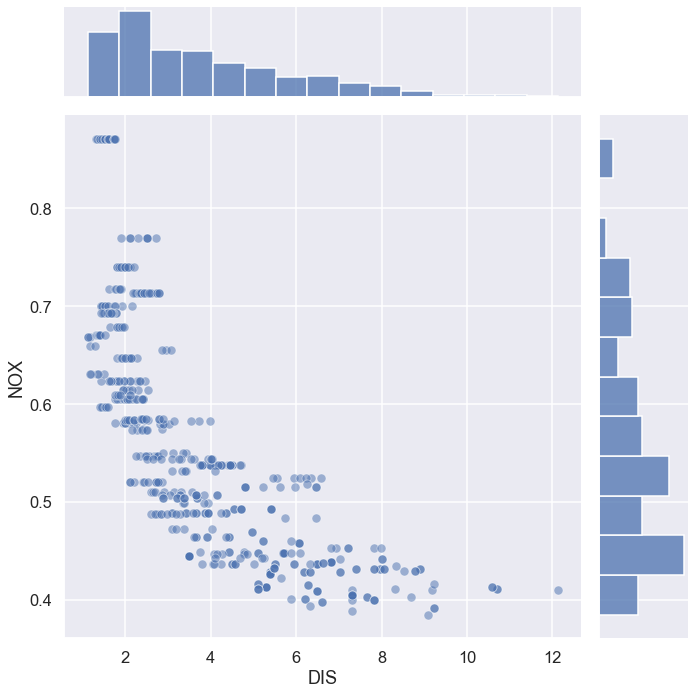

In [44]:
sns.set_context('talk')
sns.jointplot(x=boston.DIS,y=boston.NOX,height=10,kind='scatter',joint_kws={'alpha':0.5})

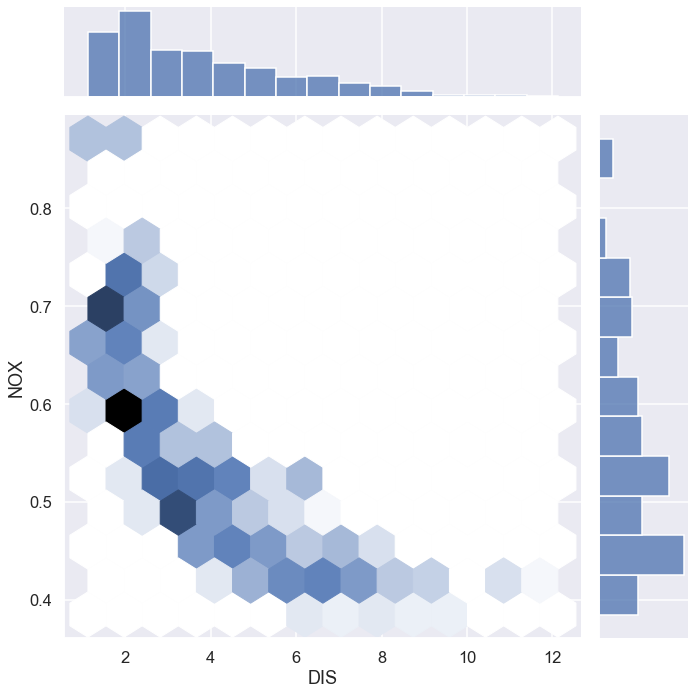

In [45]:
sns.set_context('talk')
sns.jointplot(x=boston.DIS,y=boston.NOX,height=10,kind='hex')#,joint_kws={'alpha':0.5})

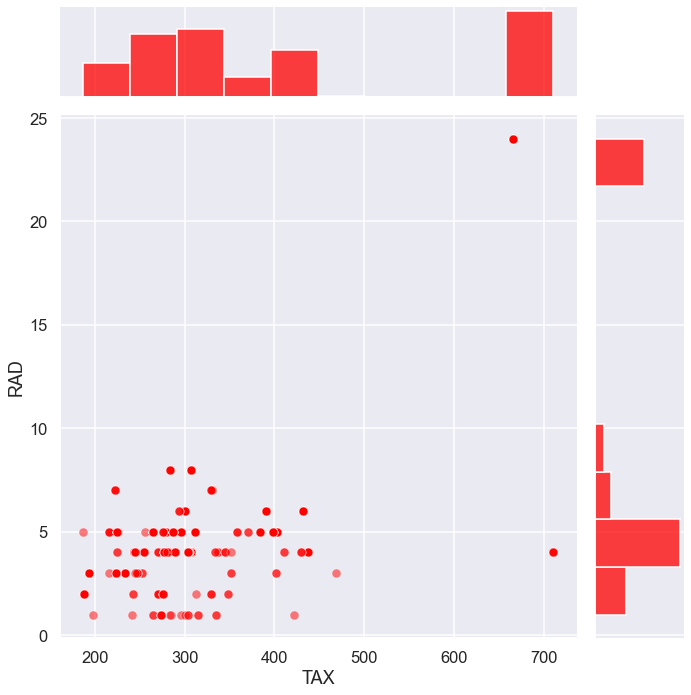

In [46]:
sns.set_context('talk')
sns.jointplot(x=boston.TAX,y=boston.RAD,height=10,kind='scatter',color='red',joint_kws={'alpha':0.5})

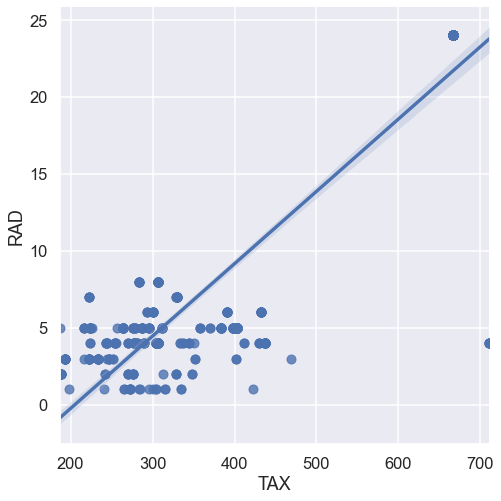

In [47]:
sns.lmplot(x='TAX',y='RAD',data=boston,height=7)

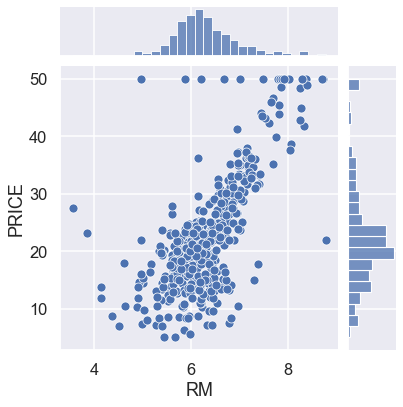

In [48]:
sns.jointplot(x='RM',y='PRICE',data=boston)

Wall time: 847 ms


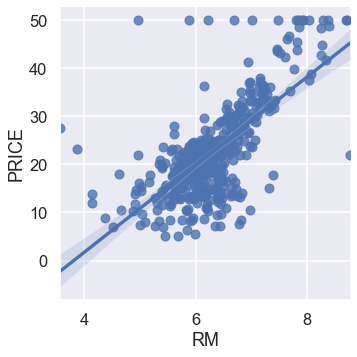

In [49]:
%%time
sns.lmplot(x='RM',y='PRICE',data=boston)
plt.savefig('test.png')

Wall time: 33.7 s


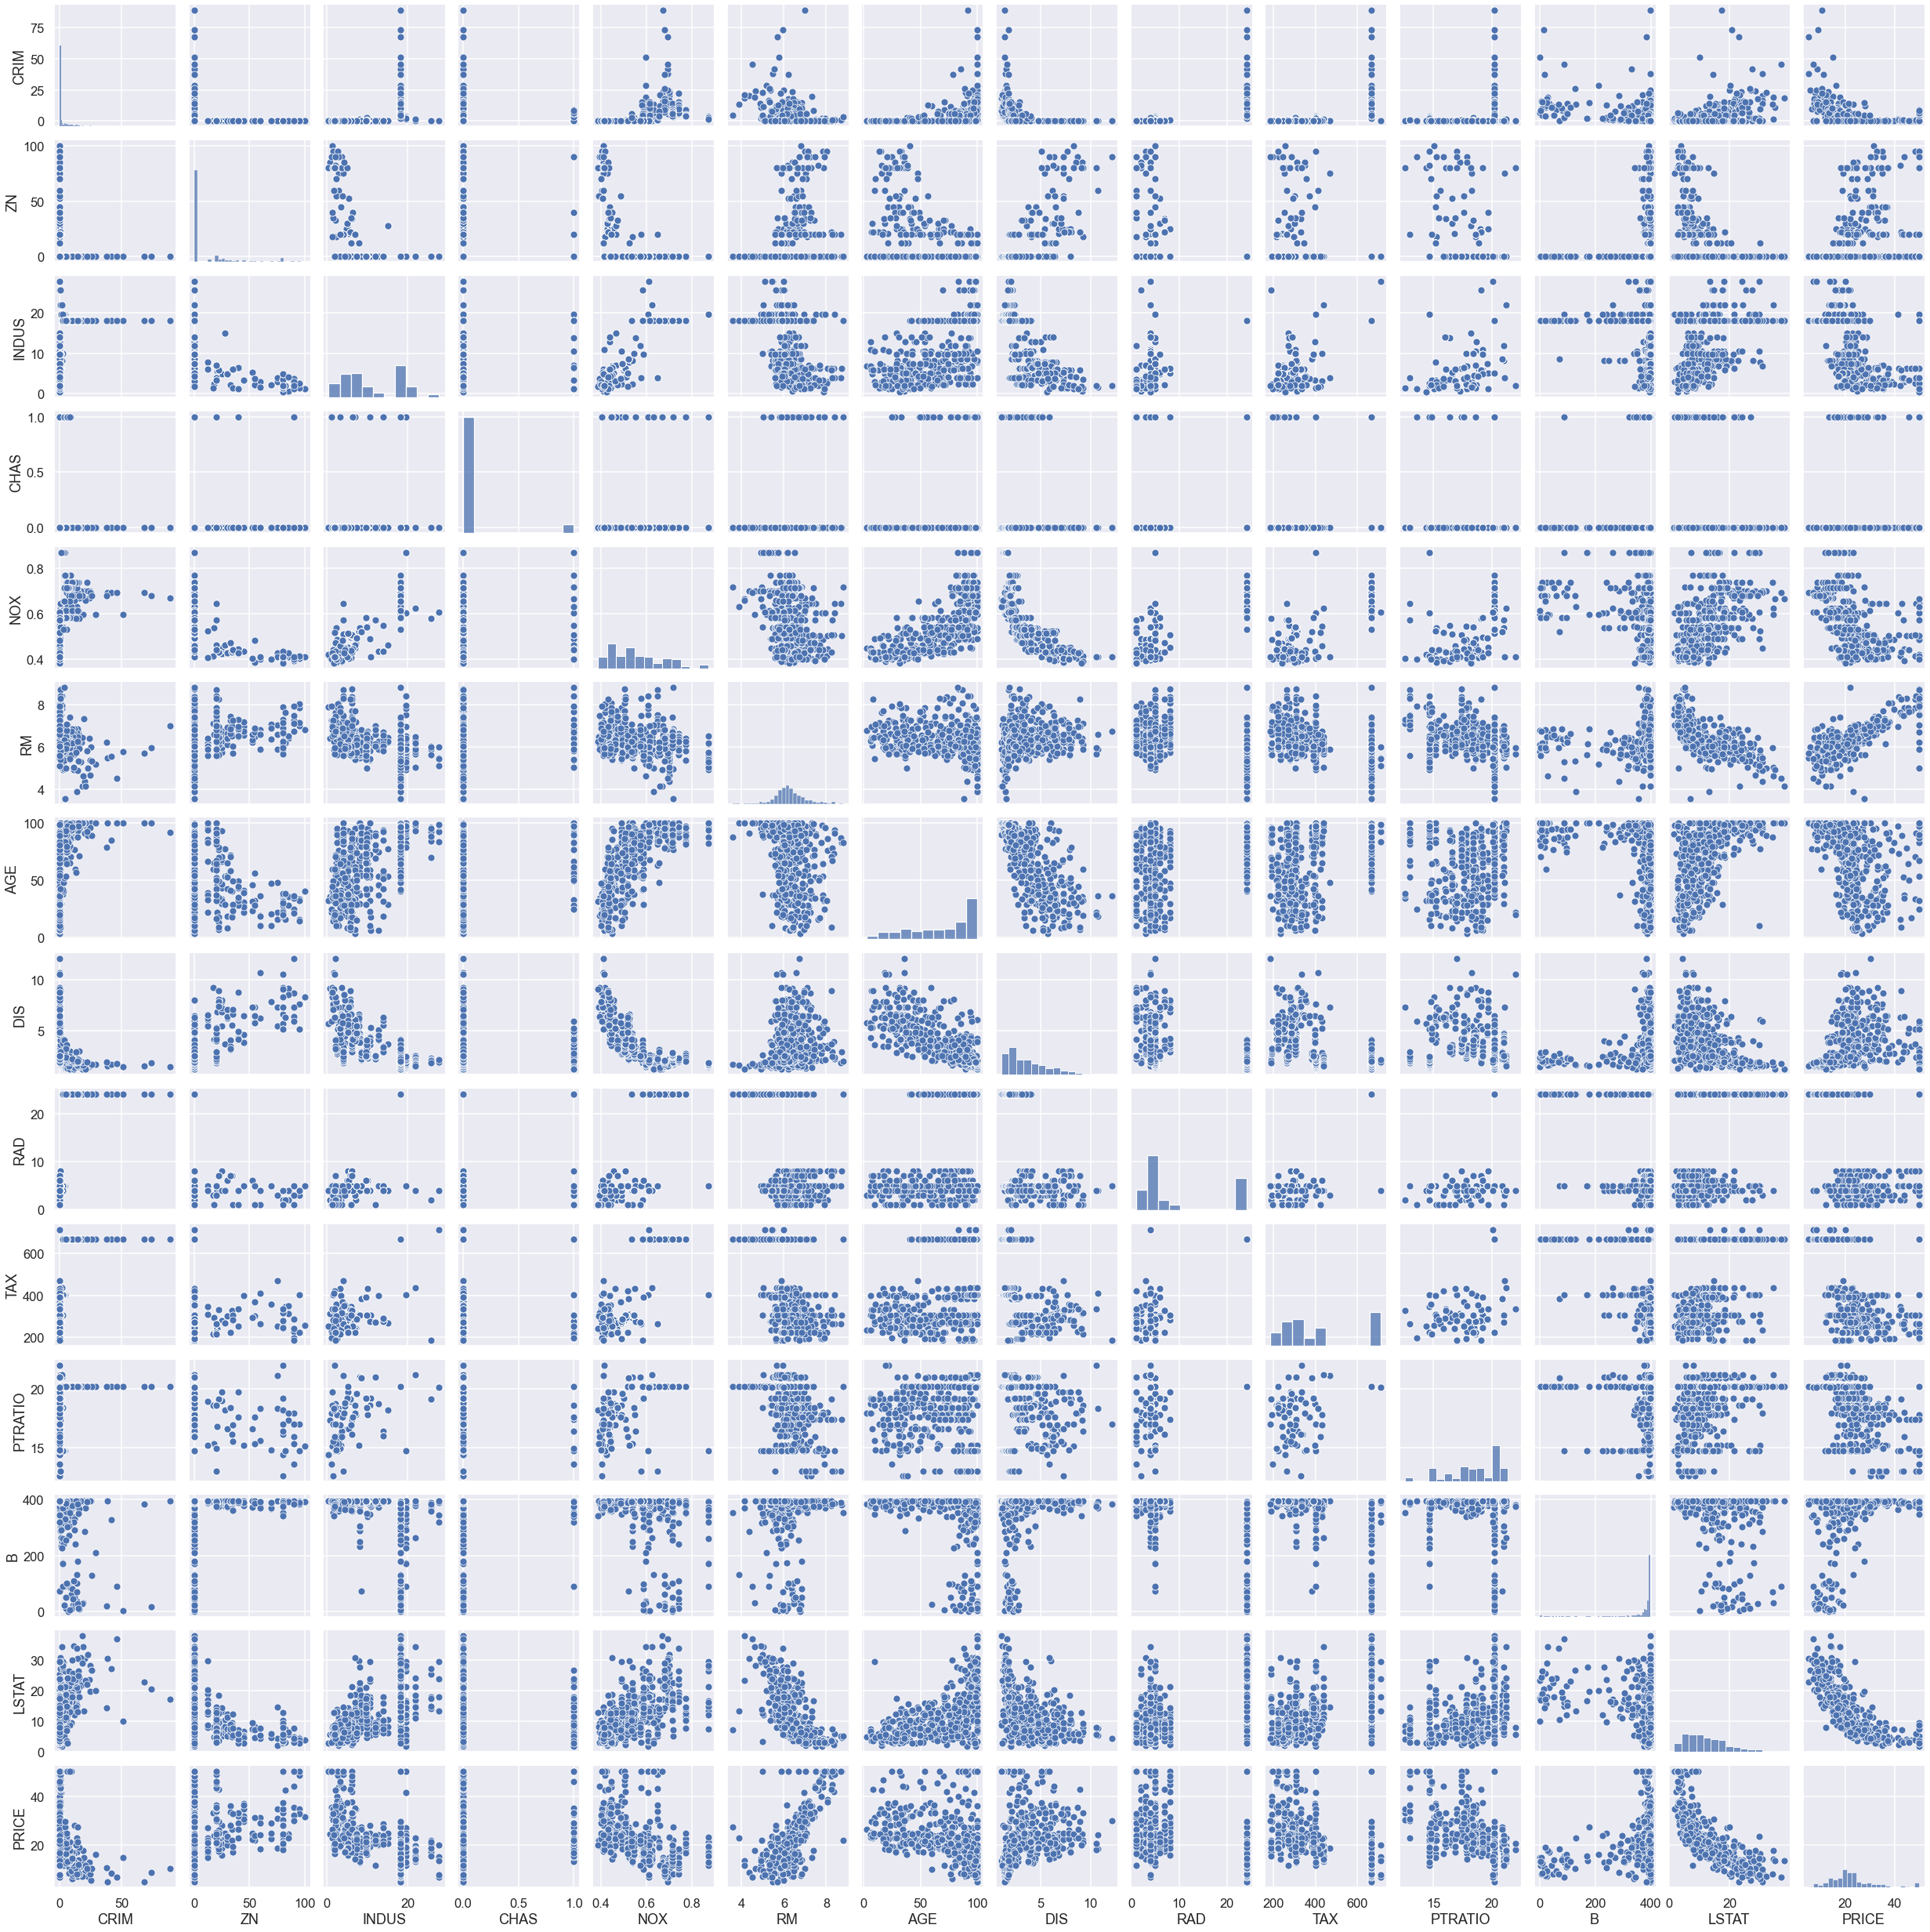

In [50]:
%%time
sns.pairplot(boston)

Wall time: 1min 26s


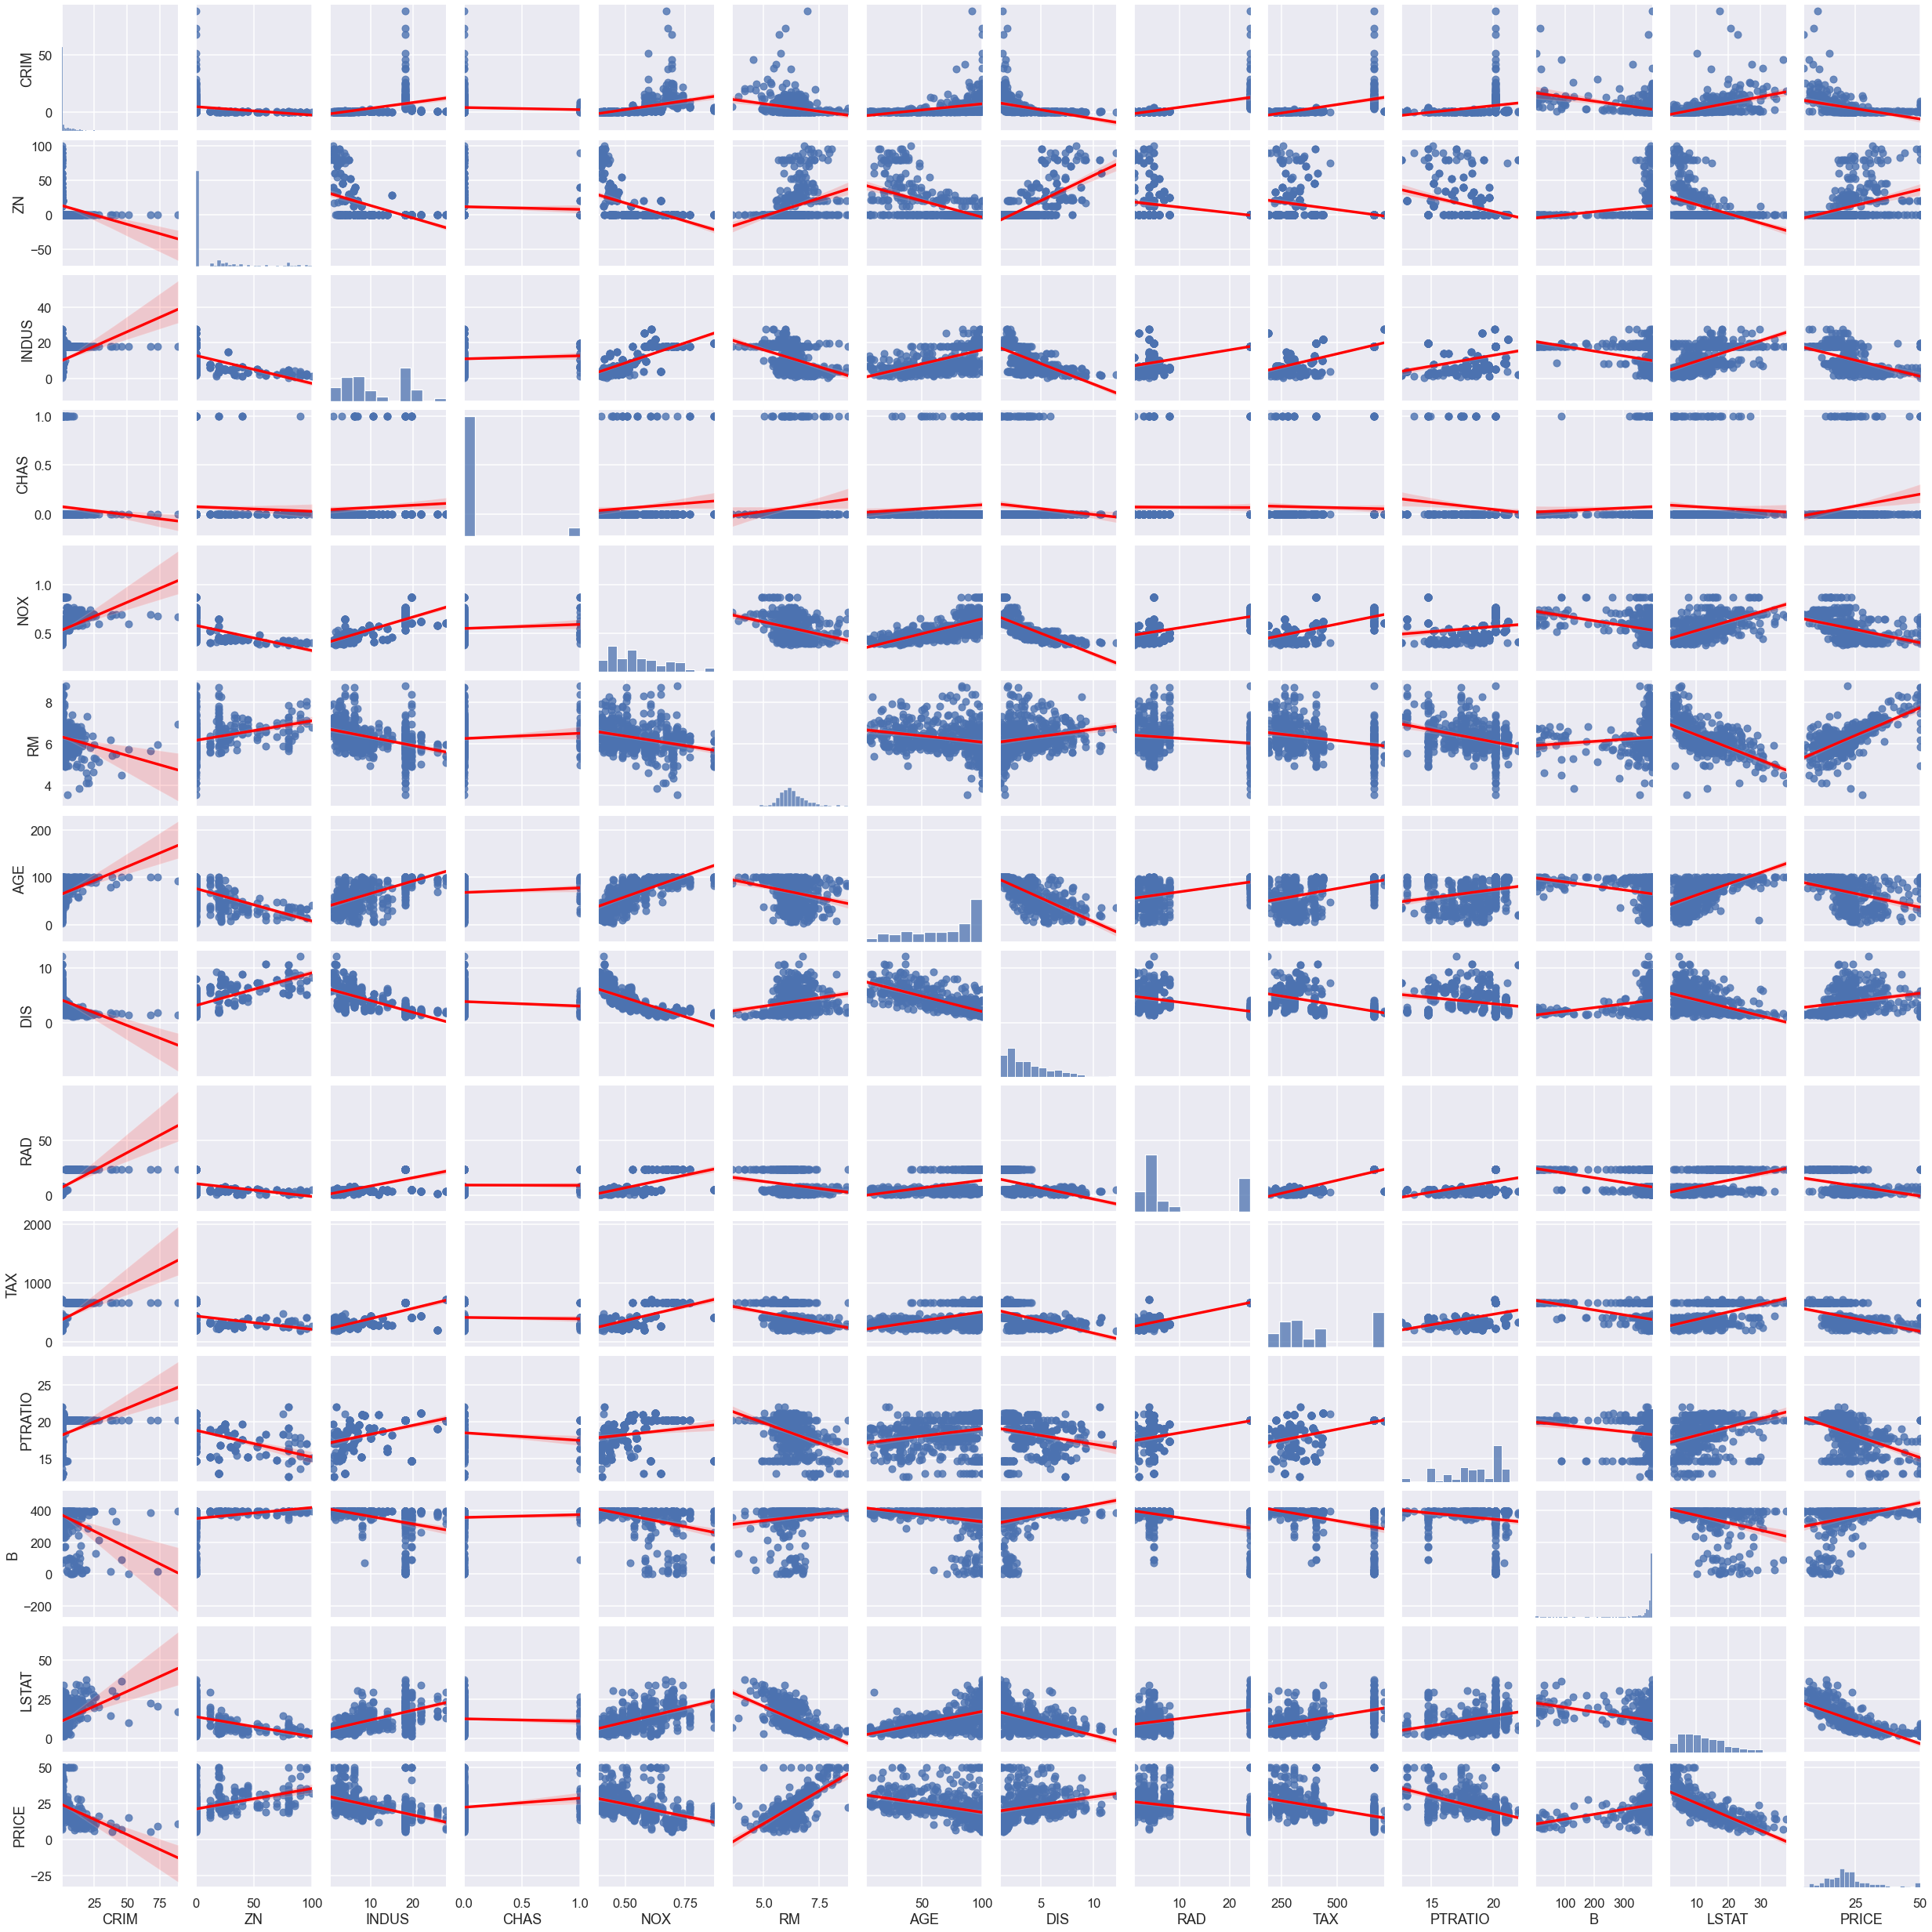

In [51]:
%%time

sns.pairplot(boston,kind='reg',plot_kws={'line_kws': {'color': 'red'}})

# Training & Test Dataset Split

In [52]:
prices = boston.PRICE
features = boston.drop('PRICE',axis=1)

In [53]:
X_train,X_test,y_train,y_test = train_test_split(features,prices,
                                                 test_size=0.2,random_state=10)

In [54]:
X_train.shape

(404, 13)

# Multivariable Regression

In [55]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [56]:
pd.Series(lr.coef_,index=features.columns).T.to_frame().T

CRIM        ZN     INDUS      CHAS        NOX        RM       AGE  \
0 -0.128181  0.063198 -0.007576  1.974515 -16.271989  3.108456  0.016292   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0 -1.483014  0.303988 -0.012082 -0.820306  0.011419 -0.581626

In [58]:
lr.score(X_train,y_train)

0.750121534530608

In [59]:
lr.score(X_test,y_test)

0.6709339839115628

## Data Transformations

In [64]:
boston.PRICE.skew()

1.1080984082549072

In [66]:
log_prices = np.log(boston.PRICE)

In [67]:
log_prices.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

In [68]:
log_prices.skew()

-0.33032129530987864

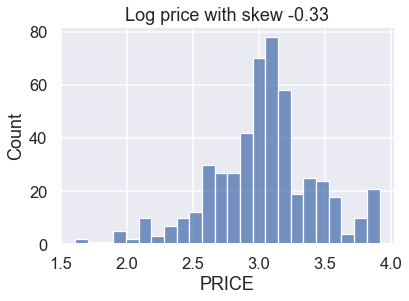

In [74]:
sns.histplot(x=log_prices)
plt.title(f"Log price with skew {log_prices.skew():.2f}");

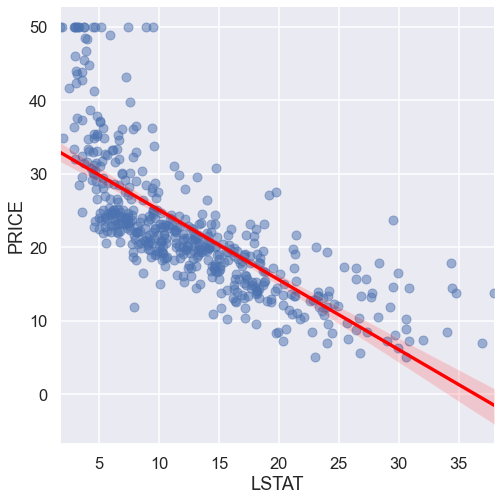

In [76]:
sns.lmplot(data=boston,x='LSTAT',y='PRICE',height=7,scatter_kws={'alpha': 0.5},line_kws={'color': 'red'})

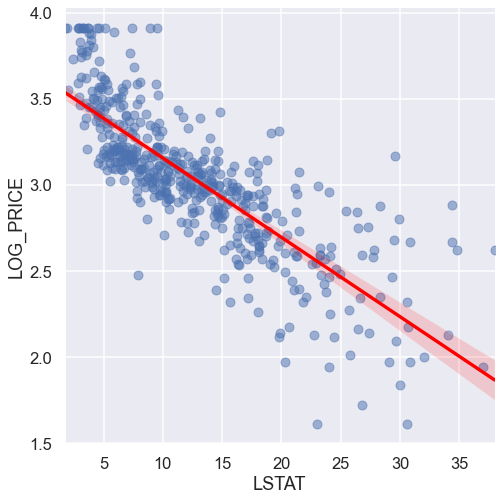

In [78]:
transformed_data = features.copy()
transformed_data['LOG_PRICE'] = log_prices


sns.lmplot(data=transformed_data,x='LSTAT',y='LOG_PRICE',height=7,scatter_kws={'alpha': 0.5},line_kws={'color': 'red'})

# Regression using Log Prices

In [79]:

prices = transformed_data['LOG_PRICE']
features = transformed_data.drop('LOG_PRICE',axis=1)
X_train,X_test,y_train,y_test = train_test_split(features,prices,
                                                 test_size=0.2,random_state=10)

lr = LinearRegression()

lr.fit(X_train,y_train)

pd.Series(lr.coef_,index=features.columns).T.to_frame().T

CRIM        ZN    INDUS      CHAS       NOX        RM       AGE  \
0 -0.010672  0.001579  0.00203  0.080331 -0.704068  0.073404  0.000763   

        DIS       RAD       TAX   PTRATIO         B    LSTAT  
0 -0.047633  0.014565 -0.000645 -0.034795  0.000516 -0.03139

In [81]:
lr.score(X_train,y_train)

0.7930234826697583

In [82]:
lr.score(X_test,y_test)

0.7446922306260724

In [83]:
# Charles River Property Premimum

np.e**0.080475

1.0838017512597784

# p values and Evaluating Coefficients

In [92]:
x_incl_constant = sm.add_constant(X_train)

model = sm.OLS(y_train,x_incl_constant)
results = model.fit()

pd.DataFrame({'coef':results.params,'p=value': round(results.pvalues,3)})

coef  p=value
const    4.059944    0.000
CRIM    -0.010672    0.000
ZN       0.001579    0.009
INDUS    0.002030    0.445
CHAS     0.080331    0.038
NOX     -0.704068    0.000
RM       0.073404    0.000
AGE      0.000763    0.209
DIS     -0.047633    0.000
RAD      0.014565    0.000
TAX     -0.000645    0.000
PTRATIO -0.034795    0.000
B        0.000516    0.000
LSTAT   -0.031390    0.000

# Testing for Multicollinearity

$$ TAX = \alpha_0 + \alpha_1 RM + \alpha_2NOX + ... + alpha_12 LSTAT $$